# Delta Equity 45 Days

Usage in C2Score: `+ ( %[Delta Equity 45 Days]% < 0 ?  -200 :  0 )`

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        5418      194976-3434647.9000     -2.8000      0.0000    108.6286      4.20003434442.3000  19693.8610 


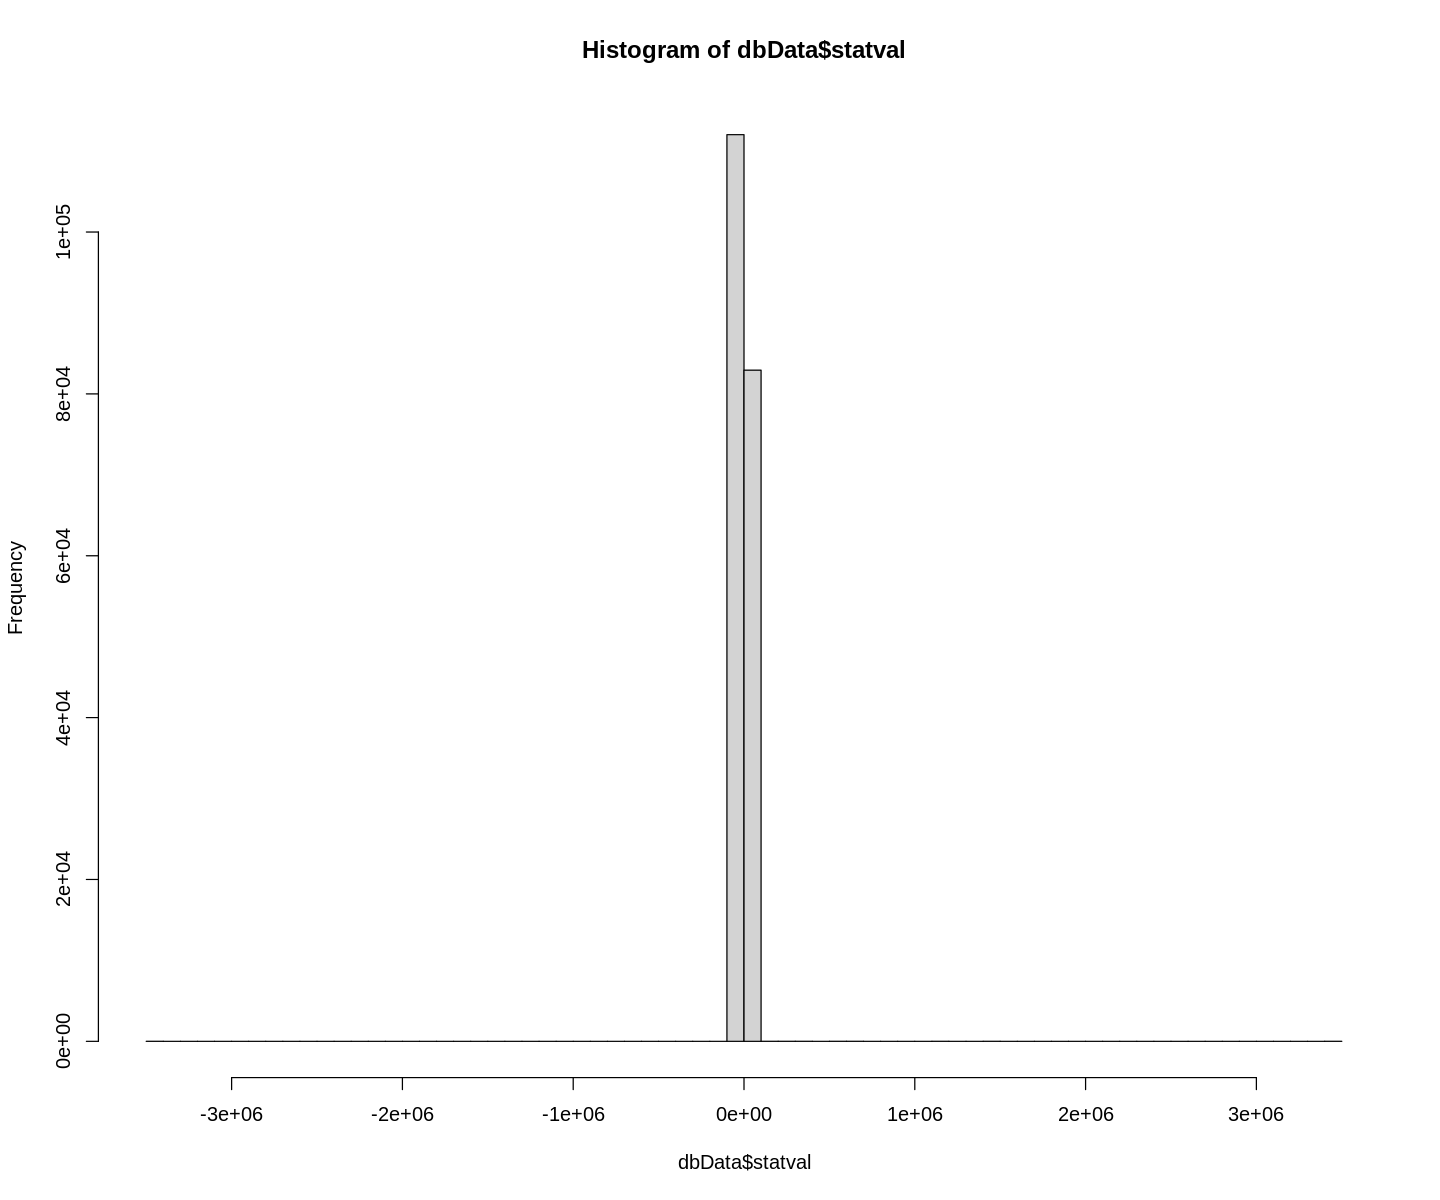

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        5191      186215    -50.0000     -2.5000      0.0000      0.4798      3.9000     50.0000     11.4119 


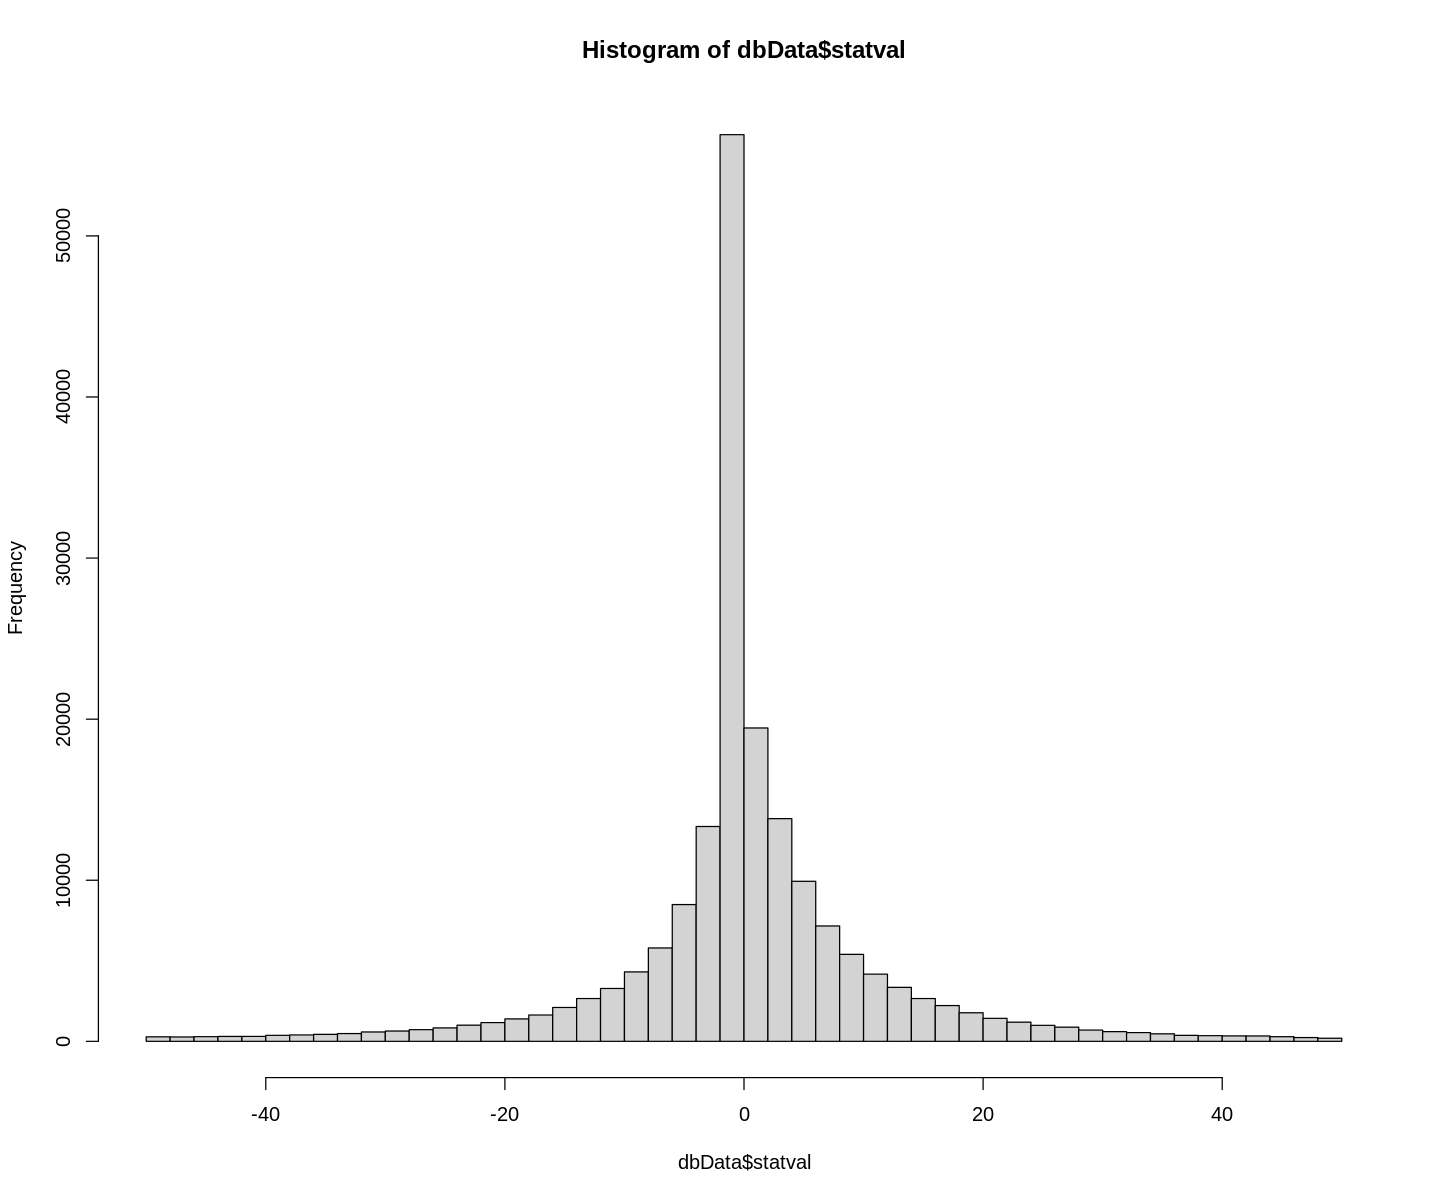

In [3]:
# Delta equity 45 days (1.5 month)? Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1700       34015      0.1000      2.1000      5.2000      7.9025     10.8000     50.0000      8.2082 


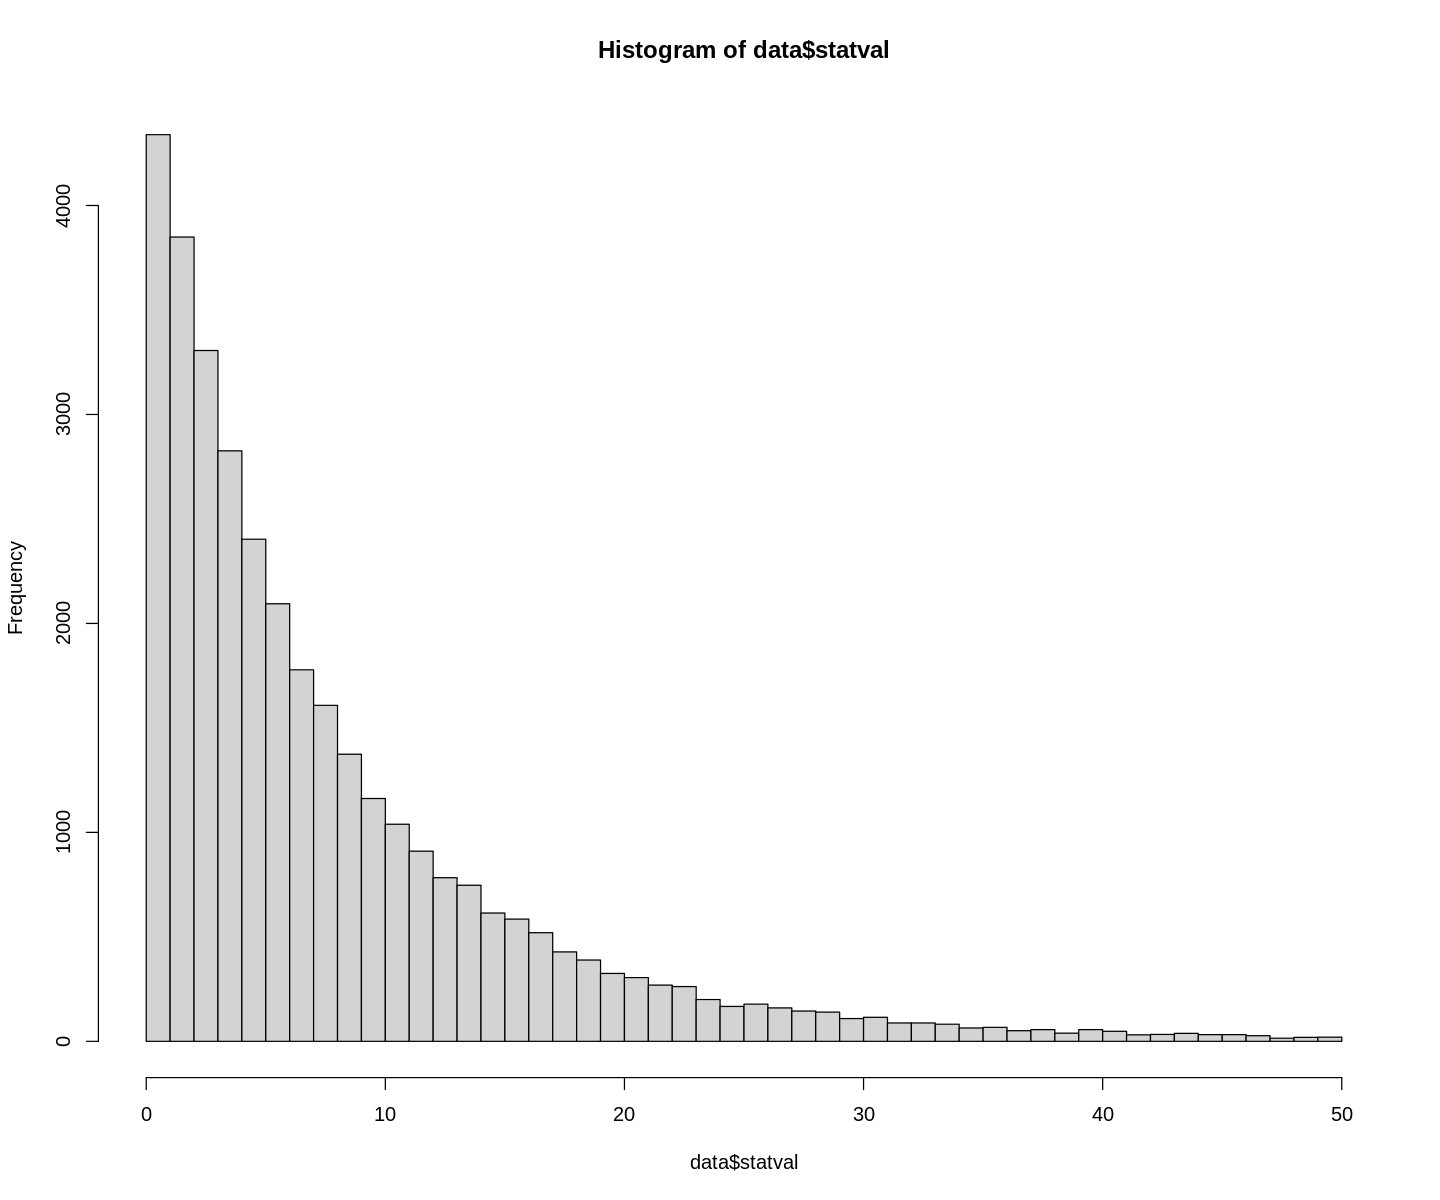

In [4]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1700       34015      0.1000      2.1000      5.2000      7.9025     10.8000     50.0000      8.2082 



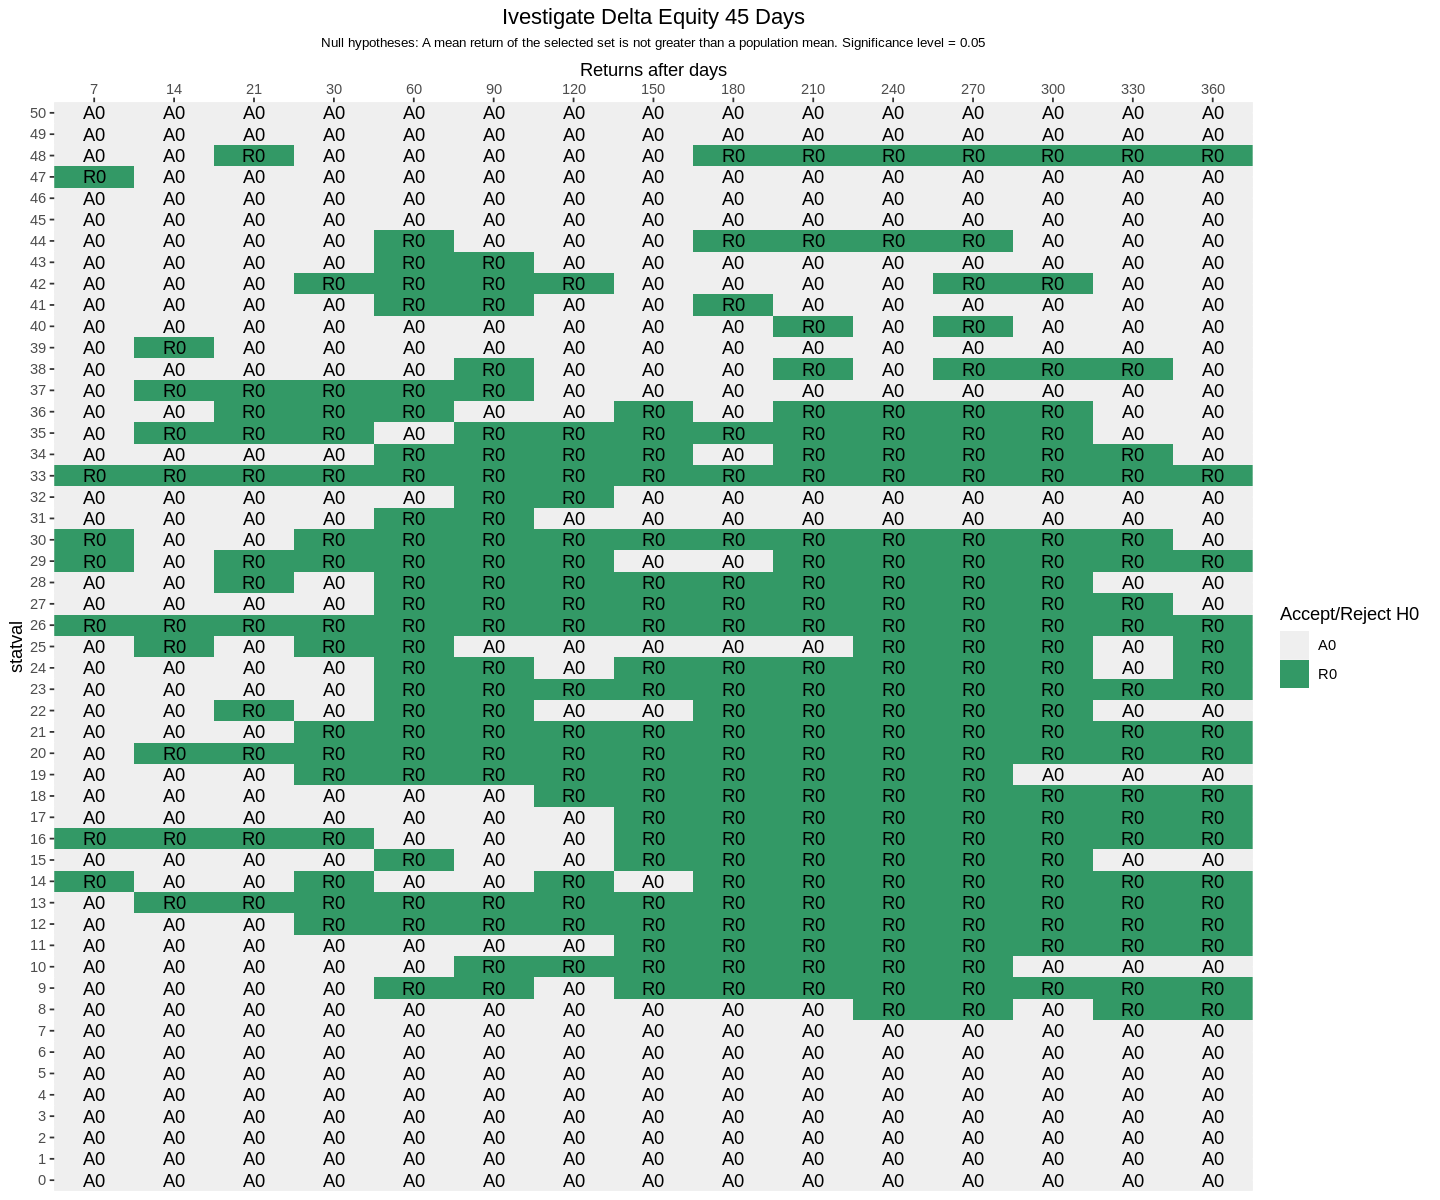

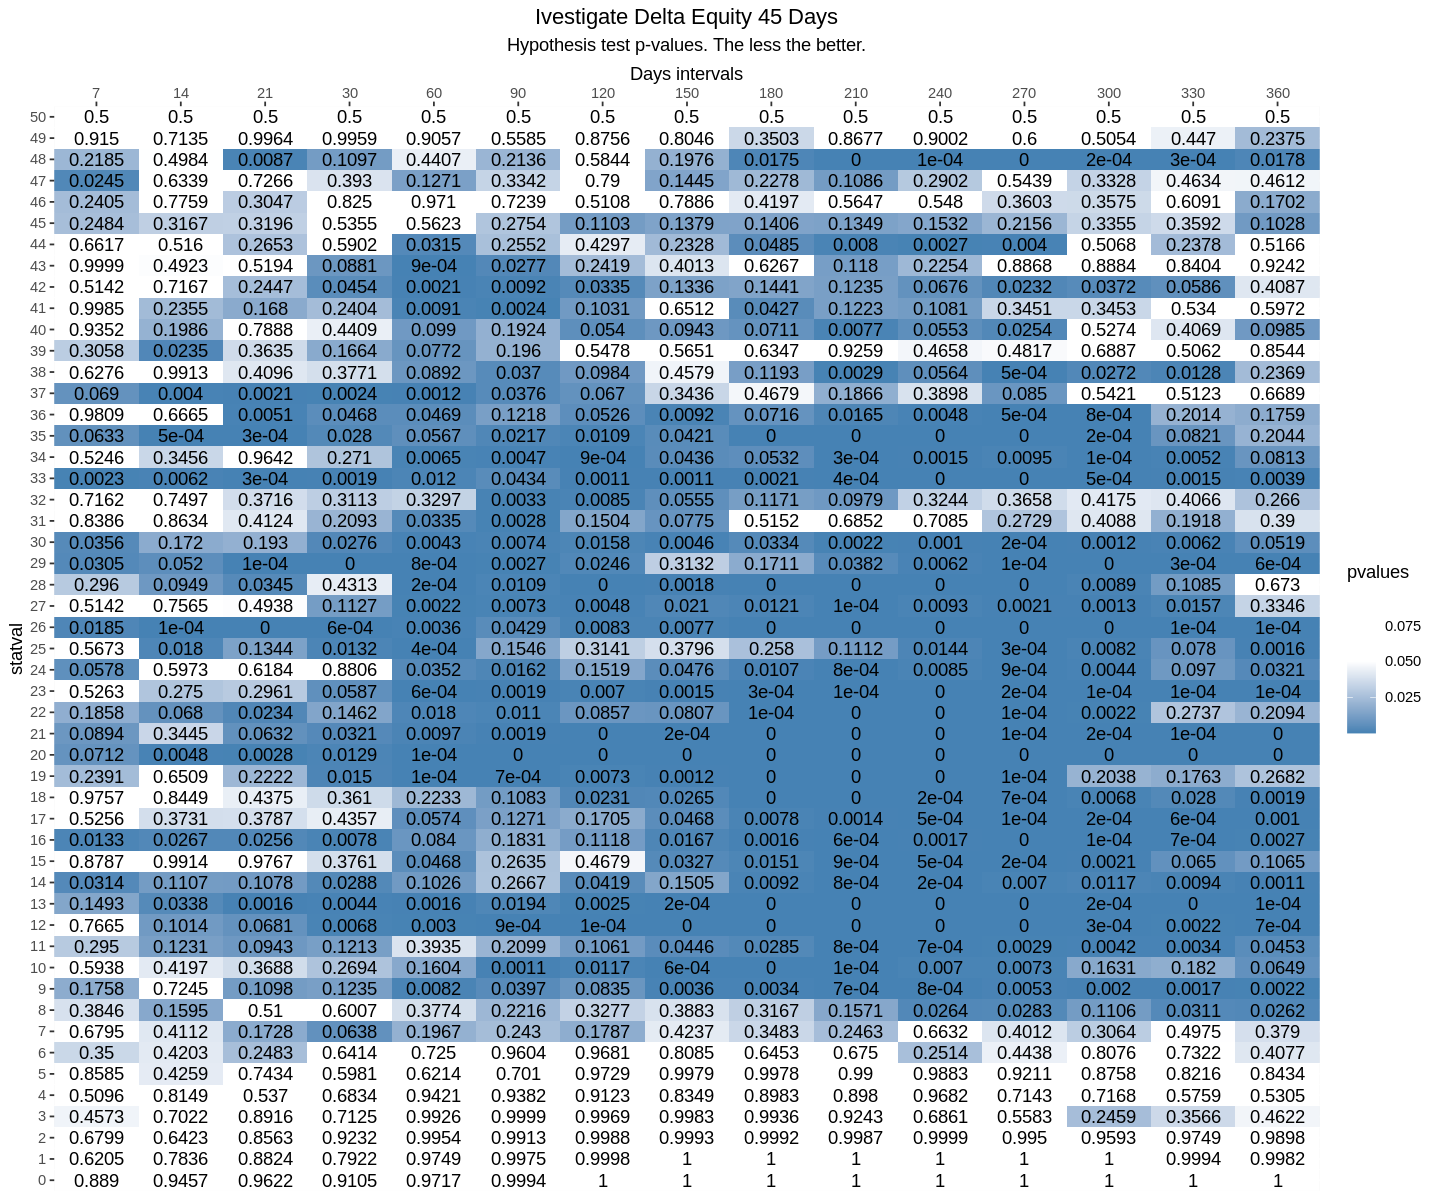

In [5]:
experiment = list(
  name = "deltaequityp45",
  description = "Ivestigate Delta Equity 45 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


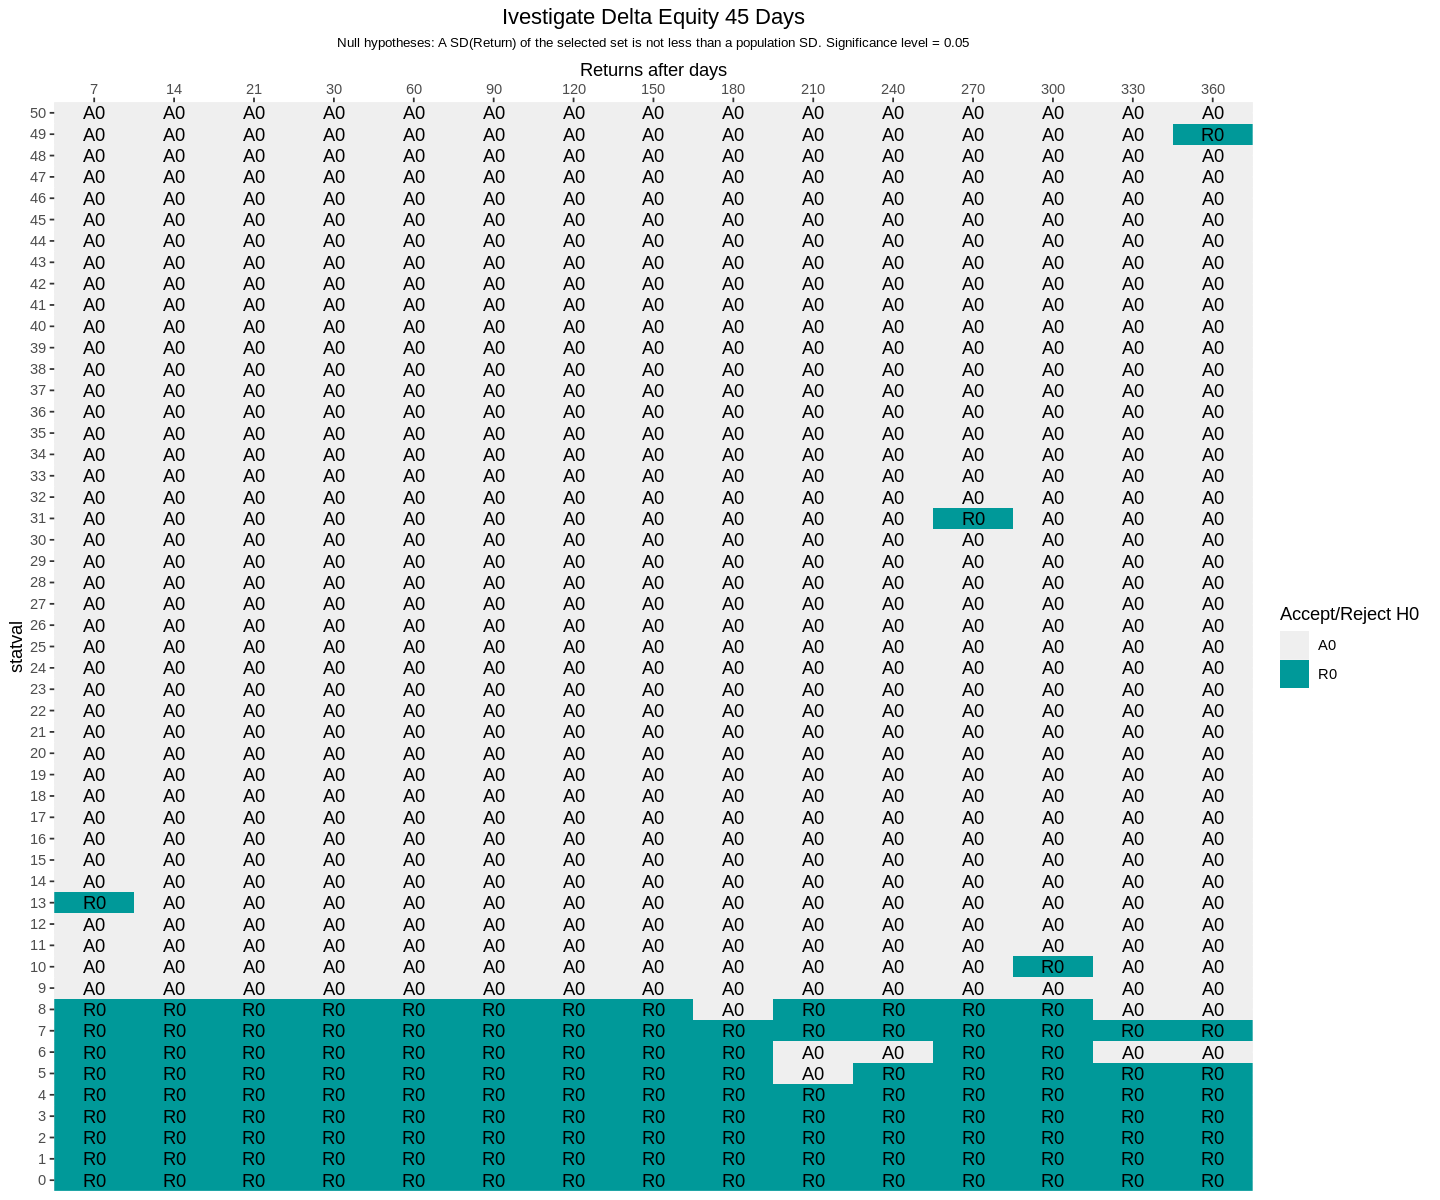

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection          Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50   21     21     21     19     18      9      8      8  
2  48 <= statval < 49   18     17     17     17     16     13     11     10  
3  47 <= statval < 48   16     15     15     15     13     10      7      7  
4  46 <= statval < 47   27     27     26     26     21     16     12     11  
5  45 <= statval < 46   29     28     28     28     21     18     16     16  
6  44 <= statval < 45   34     34     33     30     28     23     23     19  
7  43 <= statval < 44   37     35     34     32     26     24     20     17  
8  42 <= statval < 43   31     31     27     26     21     16     10      8  
9  41 <= statval < 42   35     34     34     34     24     21     17     17  
10 40 <= statval < 41   48     45     43     41     37     31     26     23  
11 39 <= statval < 40   51     49     49     46     40     32     27     23  
12 38 <= statval < 39   45     45     44     43     36     30     24     18  
13 37 <= statval < 38   52     50     50     48     41     36     31     26  
14 36 <= statval < 37   55     54     51     48     42     39     31     30  
15 35 <= statval < 36   64     64     64     63     57     51     39     37  
16 34 <= statval < 35   63     62     61     54     40     33     25     23  
17 33 <= statval < 34   83     81     81     77     65     51     43     40  
18 32 <= statval < 33   82     82     80     76     69     62     53     51  
19 31 <= statval < 32   93     92     89     84     67     59     49     45  
20 30 <= statval < 31  107    103    100     96     78     66     59     52  
21 29 <= statval < 30  113    111    105    103     89     79     70     64  
22 28 <= statval < 29  137    136    132    130    108     89     78     69  
23 27 <= statval < 28  144    141    140    136    122    108     93     82  
24 26 <= statval < 27  160    157    151    145    127    100     86     78  
25 25 <= statval < 26  167    165    162    160    136    116    101     90  
26 24 <= statval < 25  185    180    180    176    143    128    115    102  
27 23 <= statval < 24  186    185    180    172    153    140    119    106  
28 22 <= statval < 23  264    254    249    241    208    179    160    133  
29 21 <= statval < 22  272    270    266    260    225    204    177    144  
30 20 <= statval < 21  299    290    285    277    237    204    181    153  
31 19 <= statval < 20  333    332    329    321    289    250    220    200  
32 18 <= statval < 19  370    368    358    342    299    254    221    192  
33 17 <= statval < 18  433    424    417    404    354    299    258    231  
34 16 <= statval < 17  524    515    503    487    427    367    317    278  
35 15 <= statval < 16  576    563    550    529    474    425    368    328  
36 14 <= statval < 15  611    599    589    574    506    436    382    346  
37 13 <= statval < 14  738    725    702    674    596    502    453    405  
38 12 <= statval < 13  787    775    758    742    660    576    513    464  
39 11 <= statval < 12  907    897    876    858    764    667    583    520  
40 10 <= statval < 11 1009    999    971    942    826    707    628    560  
41 9 <= statval < 10  1170   1155   1134   1100    973    846    749    670  
42 8 <= statval < 9   1389   1360   1333   1285   1151    973    859    782  
43 7 <= statval < 8   1576   1544   1509   1472   1323   1163   1041    950  
44 6 <= statval < 7   1813   1783   1747   1706   1514   1344   1230   1126  
45 5 <= statval < 6   2039   1996   1957   1892   1717   1517   1385   1255  
46 4 <= statval < 5   2425   2374   2313   2261   2028   1807   1621   1457  
47 3 <= statval < 4   2831   2772   2719   2619   2341   2071   1850   1662  
48 2 <= statval < 3   3285   3215   3143   3046   2705   2374   2102   1901  
49 1 <= statval < 2   3858   3782   3703   3589   3196   2814   2523   2266  
50 0 <= statval < 1   3784   3689   3593   3471   3060   2688   2429   2163  
   Obs180 Obs210 Obs240 O


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



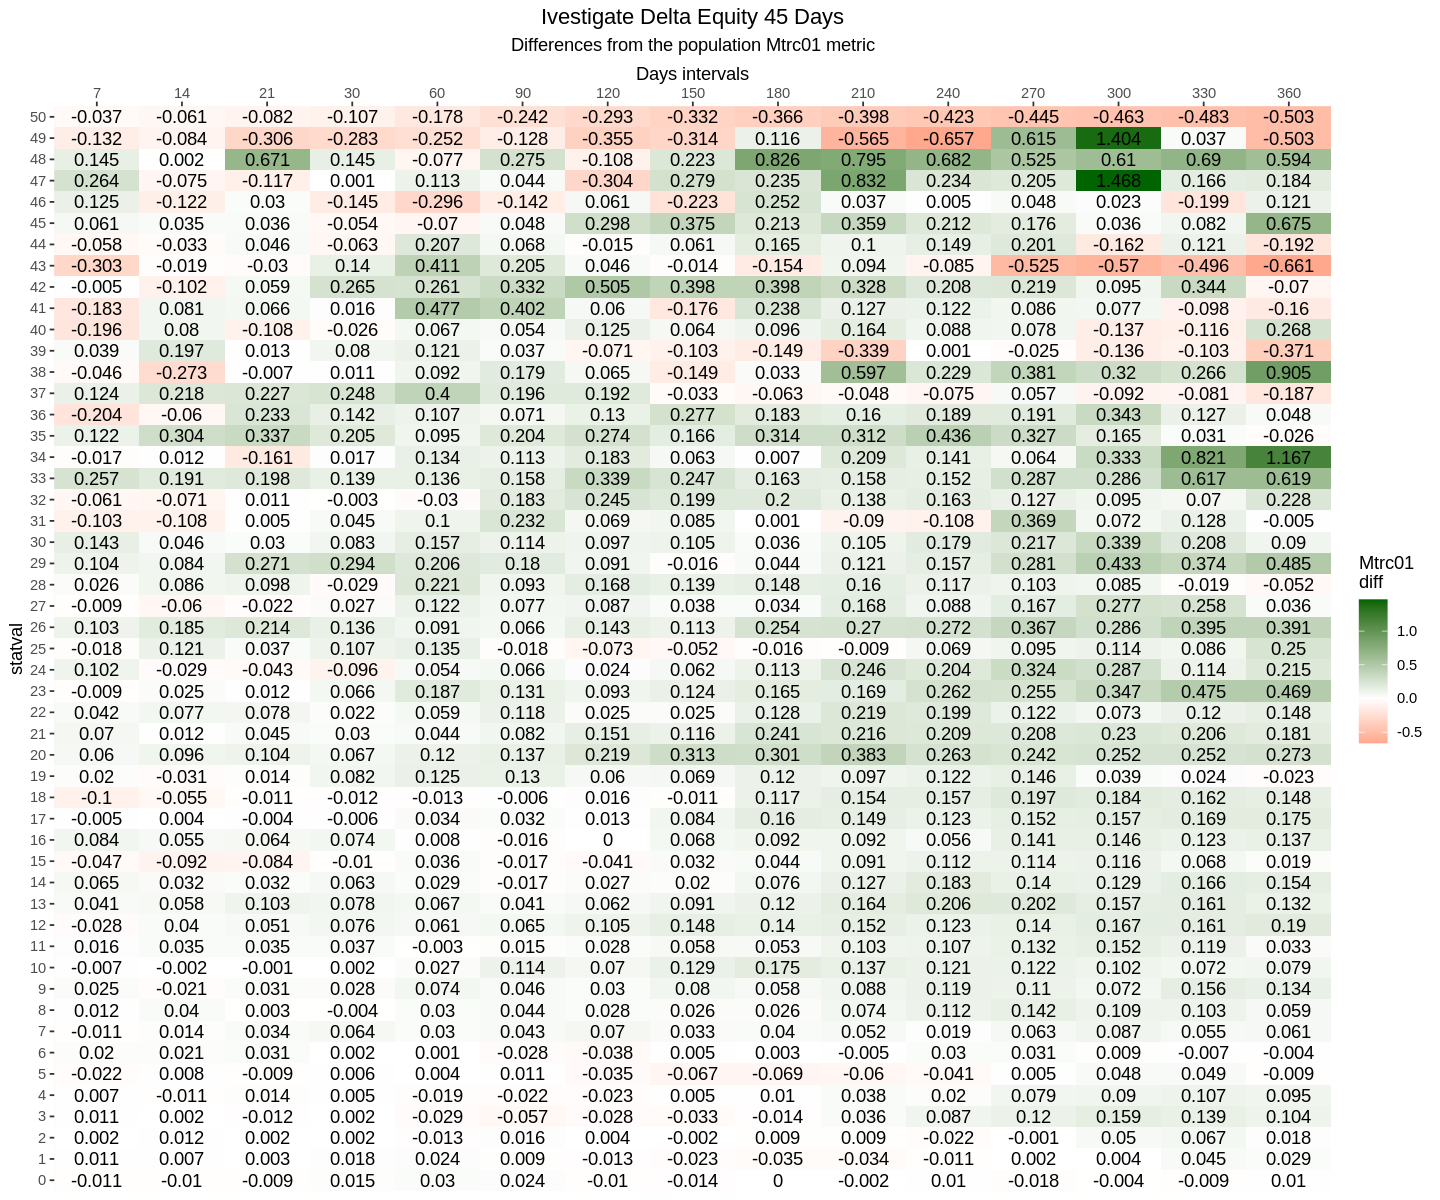

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection          Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50   19    19     19     17     16      9      8      8   
2  48 <= statval < 49   17    16     16     16     15     12     11     10   
3  47 <= statval < 48   16    15     15     15     13     10      7      7   
4  46 <= statval < 47   26    26     25     25     20     16     12     11   
5  45 <= statval < 46   26    25     25     25     18     16     14     14   
6  44 <= statval < 45   28    28     27     24     22     18     18     16   
7  43 <= statval < 44   34    32     31     29     24     22     19     16   
8  42 <= statval < 43   27    27     24     23     20     15      9      7   
9  41 <= statval < 42   34    33     33     33     23     20     16     16   
10 40 <= statval < 41   43    40     38     38     34     28     24     21   
11 39 <= statval < 40   46    44     44     42     37     30     25     21   
12 38 <= statval < 39   44    44     43     42     35     29     23     17   
13 37 <= statval < 38   48    46     46     44     38     33     28     23   
14 36 <= statval < 37   53    52     49     46     40     37     31     30   
15 35 <= statval < 36   52    52     52     52     46     43     31     29   
16 34 <= statval < 35   58    57     56     50     37     30     23     21   
17 33 <= statval < 34   71    70     70     67     58     45     38     35   
18 32 <= statval < 33   69    69     68     64     58     51     43     41   
19 31 <= statval < 32   82    81     79     74     59     51     41     37   
20 30 <= statval < 31   89    87     85     83     69     58     53     46   
21 29 <= statval < 30   96    95     89     87     76     67     60     55   
22 28 <= statval < 29  107   106    102    100     83     69     61     53   
23 27 <= statval < 28  111   110    109    105     92     79     69     62   
24 26 <= statval < 27  132   130    126    120    109     86     76     68   
25 25 <= statval < 26  137   136    133    131    111     96     84     75   
26 24 <= statval < 25  143   139    139    136    110    100     92     83   
27 23 <= statval < 24  149   148    144    137    119    108     90     82   
28 22 <= statval < 23  202   194    189    183    155    129    116     97   
29 21 <= statval < 22  206   205    201    197    168    151    133    106   
30 20 <= statval < 21  206   199    196    192    165    140    126    107   
31 19 <= statval < 20  235   234    231    225    200    170    149    132   
32 18 <= statval < 19  257   255    248    235    204    172    154    136   
33 17 <= statval < 18  282   274    269    260    223    187    160    144   
34 16 <= statval < 17  331   325    318    311    267    229    204    175   
35 15 <= statval < 16  366   359    351    337    293    263    230    201   
36 14 <= statval < 15  365   354    348    337    285    243    213    198   
37 13 <= statval < 14  427   421    409    390    339    277    248    221   
38 12 <= statval < 13  464   457    445    438    386    331    299    265   
39 11 <= statval < 12  494   488    477    466    411    355    302    274   
40 10 <= statval < 11  545   536    523    510    431    365    323    291   
41 9 <= statval < 10   609   598    585    561    493    405    362    329   
42 8 <= statval < 9    667   649    632    607    529    443    390    355   
43 7 <= statval < 8    709   693    674    657    571    487    425    385   
44 6 <= statval < 7    750   734    727    710    614    519    454    408   
45 5 <= statval < 6    802   786    768    735    659    555    494    445   
46 4 <= statval < 5    868   848    823    803    709    616    536    479   
47 3 <= statval < 4    918   896    883    845    717    619    554    489   
48 2 <= statval < 3    989   965    945    904    784    667    573    500   
49 1 <= statval < 2   1019   997    978    943    811    686    601    527   
50 0 <= statval < 1   1008   981    955    924    786    679    610    526   
   Sys180 Sys210 Sys240 S

### Discussion

.....................

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1440       28072      0.1000      2.1000      5.0000      7.5748     10.3000     50.0000      7.8674 


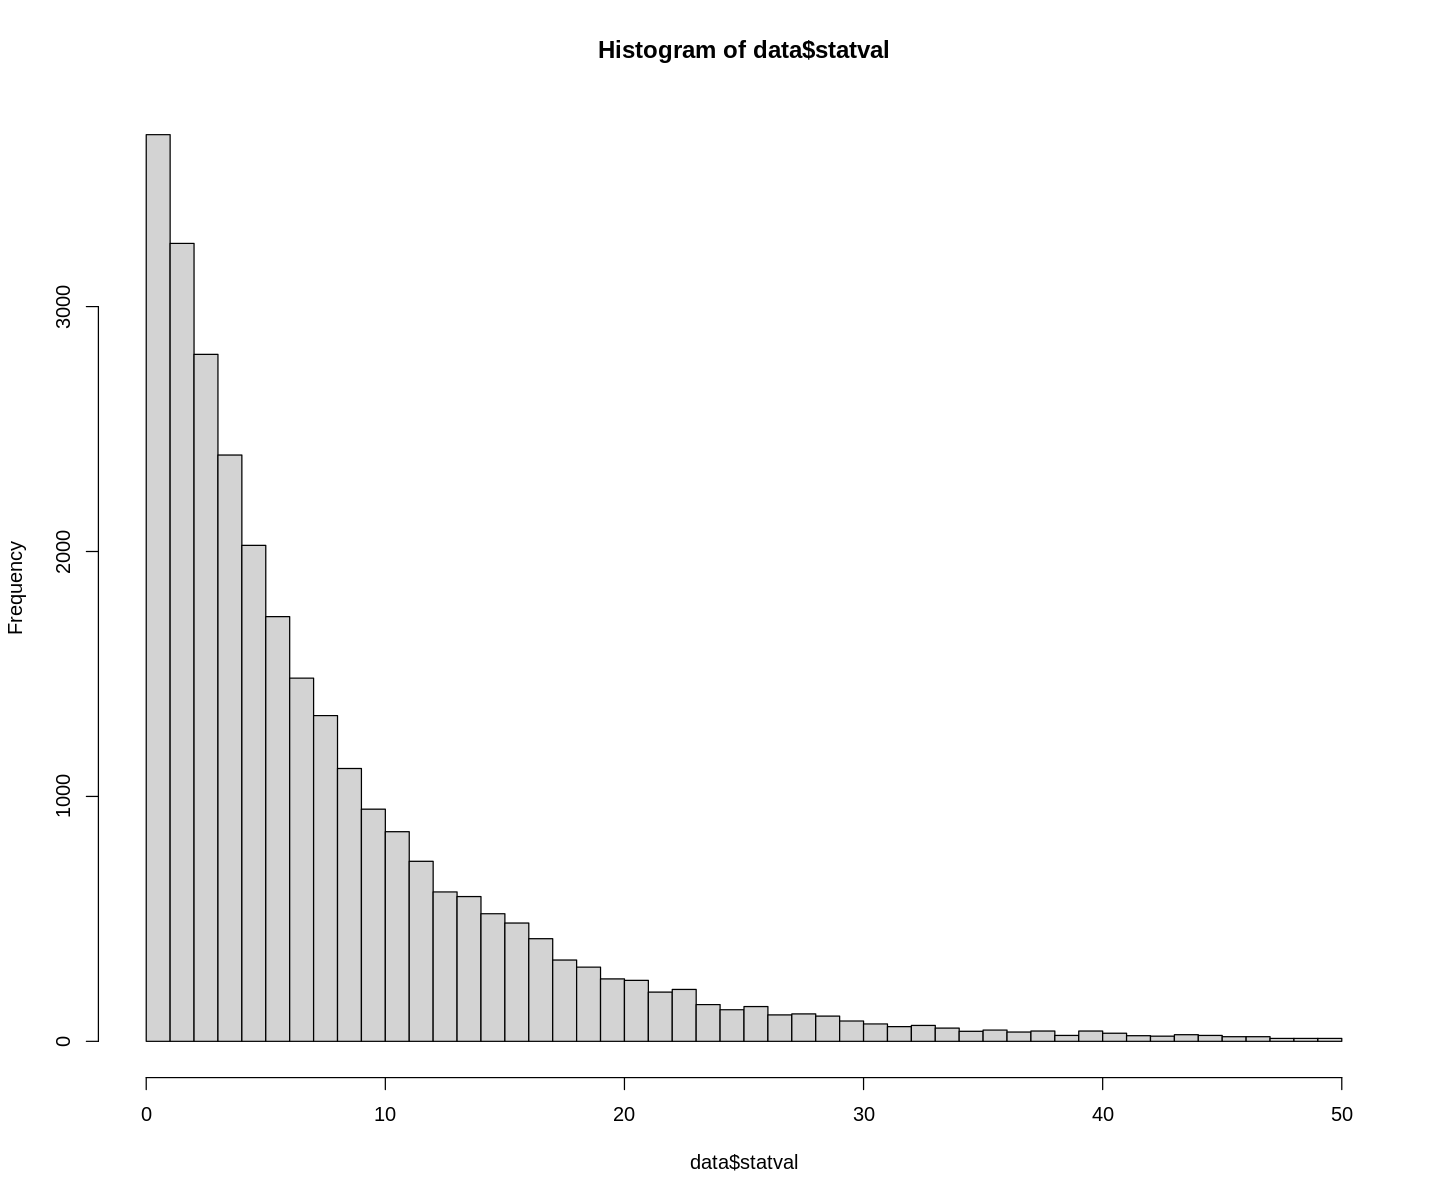

In [10]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1440       28072      0.1000      2.1000      5.0000      7.5748     10.3000     50.0000      7.8674 



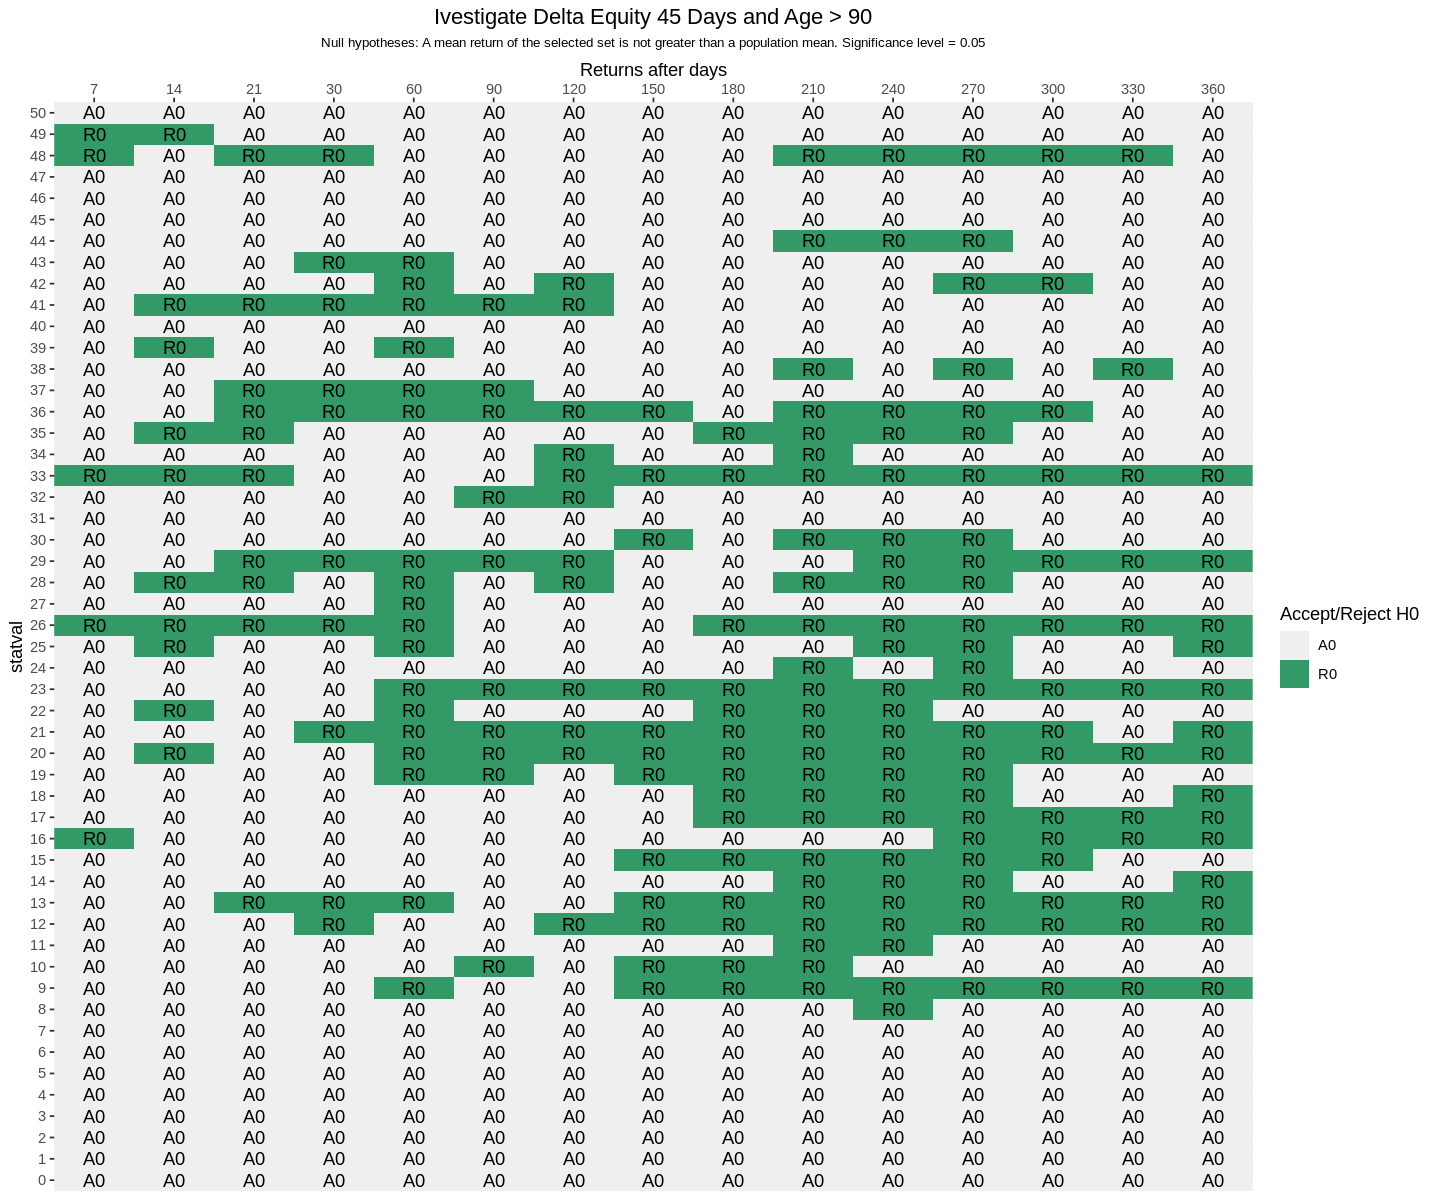

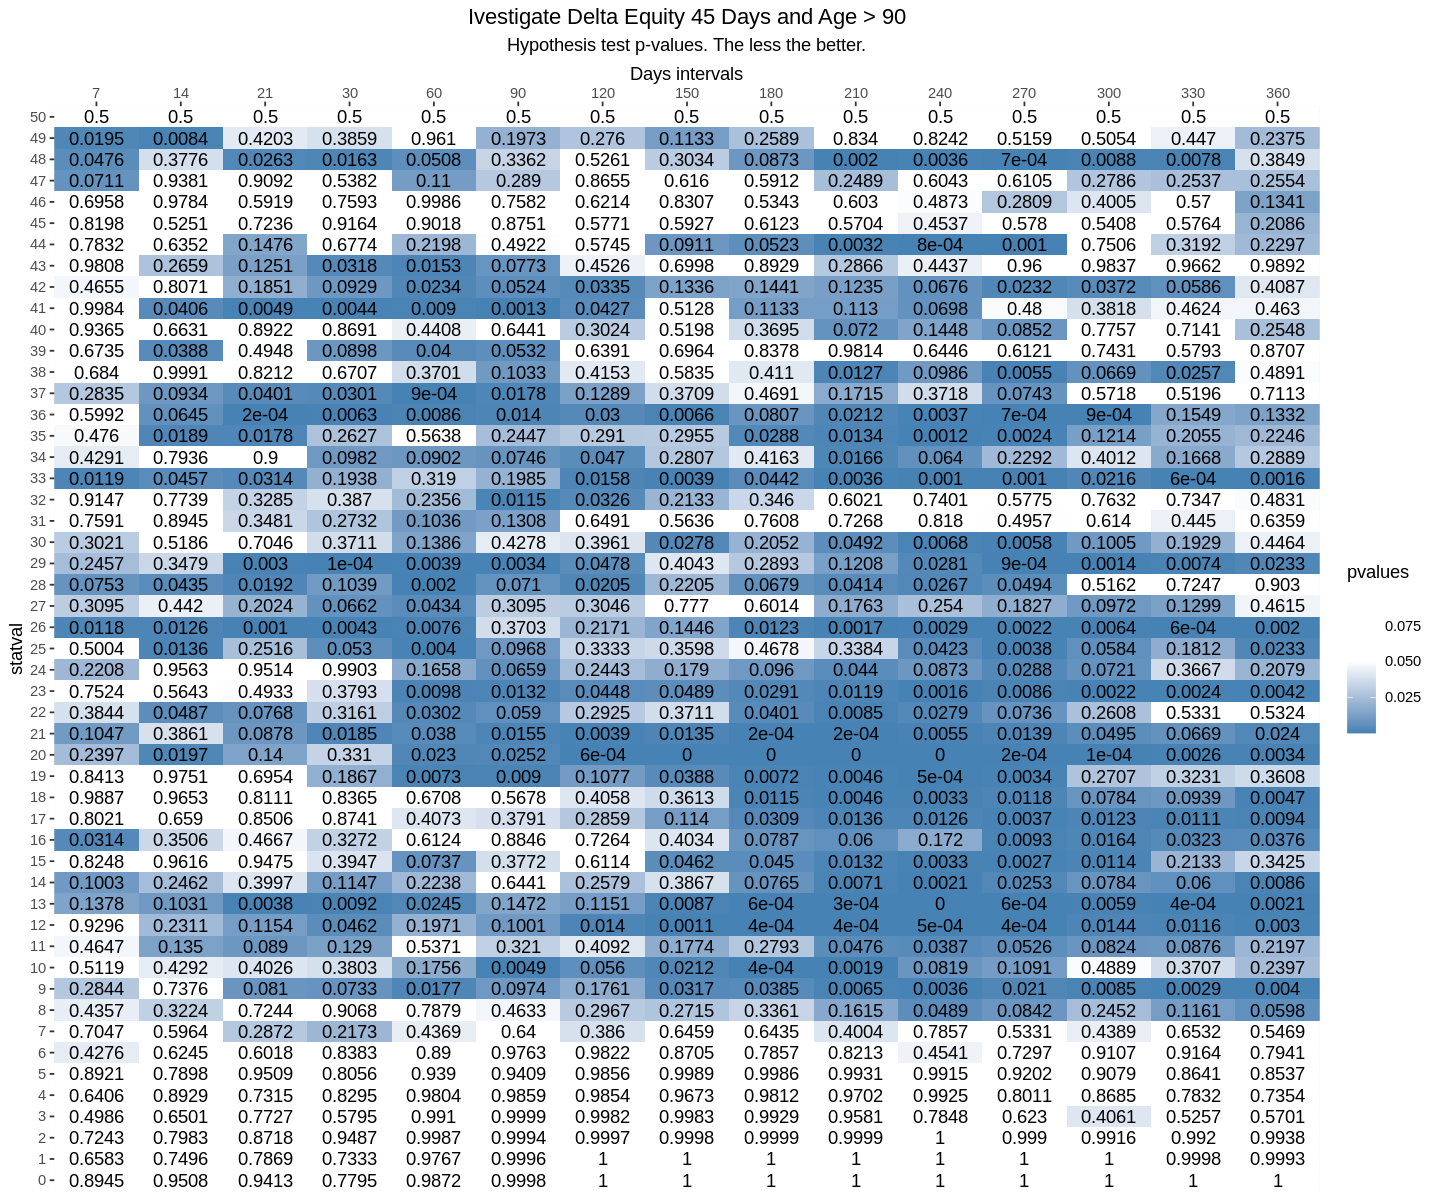

In [11]:
experiment = list(
  name = "deltaequityp45 and Age > 90",
  description = "Ivestigate Delta Equity 45 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


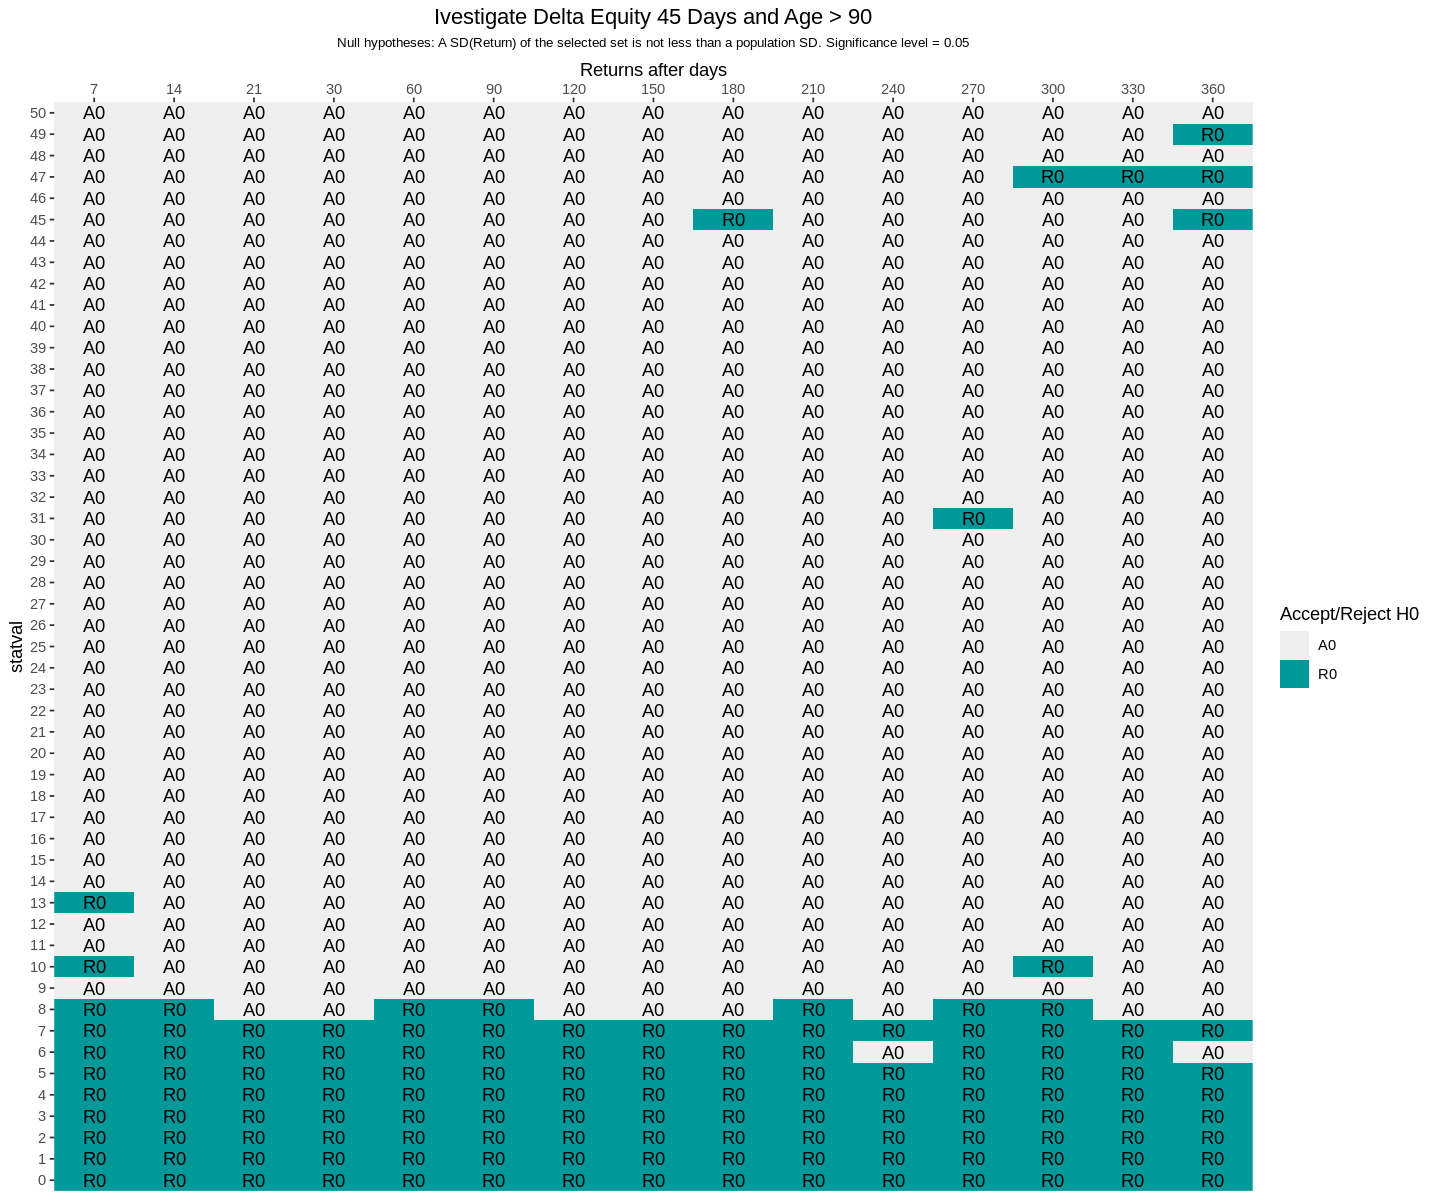

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection          Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50   12     12     12     11     11      6      5      5  
2  48 <= statval < 49   12     12     12     12     11      9      8      7  
3  47 <= statval < 48   11     10     10     10      8      6      4      4  
4  46 <= statval < 47   19     19     18     18     14     12      9      8  
5  45 <= statval < 46   18     17     17     17     12     12     11     11  
6  44 <= statval < 45   26     26     25     25     23     18     18     14  
7  43 <= statval < 44   25     24     24     22     20     19     15     13  
8  42 <= statval < 43   20     20     18     17     12     11     10      8  
9  41 <= statval < 42   24     23     23     23     16     14     12     12  
10 40 <= statval < 41   36     35     33     33     30     26     21     19  
11 39 <= statval < 40   37     36     36     34     31     25     23     19  
12 38 <= statval < 39   27     27     26     25     20     18     14     10  
13 37 <= statval < 38   40     39     39     37     32     29     26     23  
14 36 <= statval < 37   38     37     35     32     28     26     22     21  
15 35 <= statval < 36   46     46     46     45     41     36     28     27  
16 34 <= statval < 35   41     40     39     34     25     20     15     13  
17 33 <= statval < 34   56     55     55     52     43     34     29     26  
18 32 <= statval < 33   57     57     55     52     49     48     42     41  
19 31 <= statval < 32   61     60     57     57     47     42     35     33  
20 30 <= statval < 31   67     63     62     58     49     44     39     34  
21 29 <= statval < 30   86     84     79     77     67     59     53     48  
22 28 <= statval < 29  101    100     96     94     79     67     59     53  
23 27 <= statval < 28  105    102    101     99     93     82     71     61  
24 26 <= statval < 27  113    110    105    100     92     72     62     56  
25 25 <= statval < 26  133    131    128    126    108     94     83     72  
26 24 <= statval < 25  144    140    140    137    113    103     92     83  
27 23 <= statval < 24  140    139    134    130    115    105     88     79  
28 22 <= statval < 23  206    196    191    184    160    139    123    102  
29 21 <= statval < 22  209    207    204    199    177    162    140    112  
30 20 <= statval < 21  241    233    229    222    193    164    144    122  
31 19 <= statval < 20  257    256    253    247    226    202    179    161  
32 18 <= statval < 19  291    290    281    267    237    208    183    160  
33 17 <= statval < 18  333    326    319    307    272    236    212    192  
34 16 <= statval < 17  426    417    407    393    351    306    262    235  
35 15 <= statval < 16  475    463    455    437    400    364    317    281  
36 14 <= statval < 15  504    492    484    474    425    368    327    295  
37 13 <= statval < 14  586    575    556    534    483    413    378    337  
38 12 <= statval < 13  616    606    595    584    529    467    417    382  
39 11 <= statval < 12  731    721    704    689    617    553    493    443  
40 10 <= statval < 11  824    817    792    770    686    605    543    484  
41 9 <= statval < 10   957    942    923    891    808    727    654    587  
42 8 <= statval < 9   1111   1089   1067   1027    931    801    717    650  
43 7 <= statval < 8   1314   1285   1256   1224   1112    990    892    816  
44 6 <= statval < 7   1507   1483   1449   1411   1265   1151   1073    987  
45 5 <= statval < 6   1684   1644   1609   1563   1428   1284   1186   1077  
46 4 <= statval < 5   2030   1988   1936   1893   1712   1544   1402   1258  
47 3 <= statval < 4   2397   2341   2295   2215   2008   1796   1621   1468  
48 2 <= statval < 3   2790   2729   2671   2587   2312   2056   1830   1668  
49 1 <= statval < 2   3252   3181   3116   3023   2733   2440   2215   2004  
50 0 <= statval < 1   3217   3132   3046   2948   2623   2328   2111   1908  
   Obs180 Obs210 Obs240 O


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



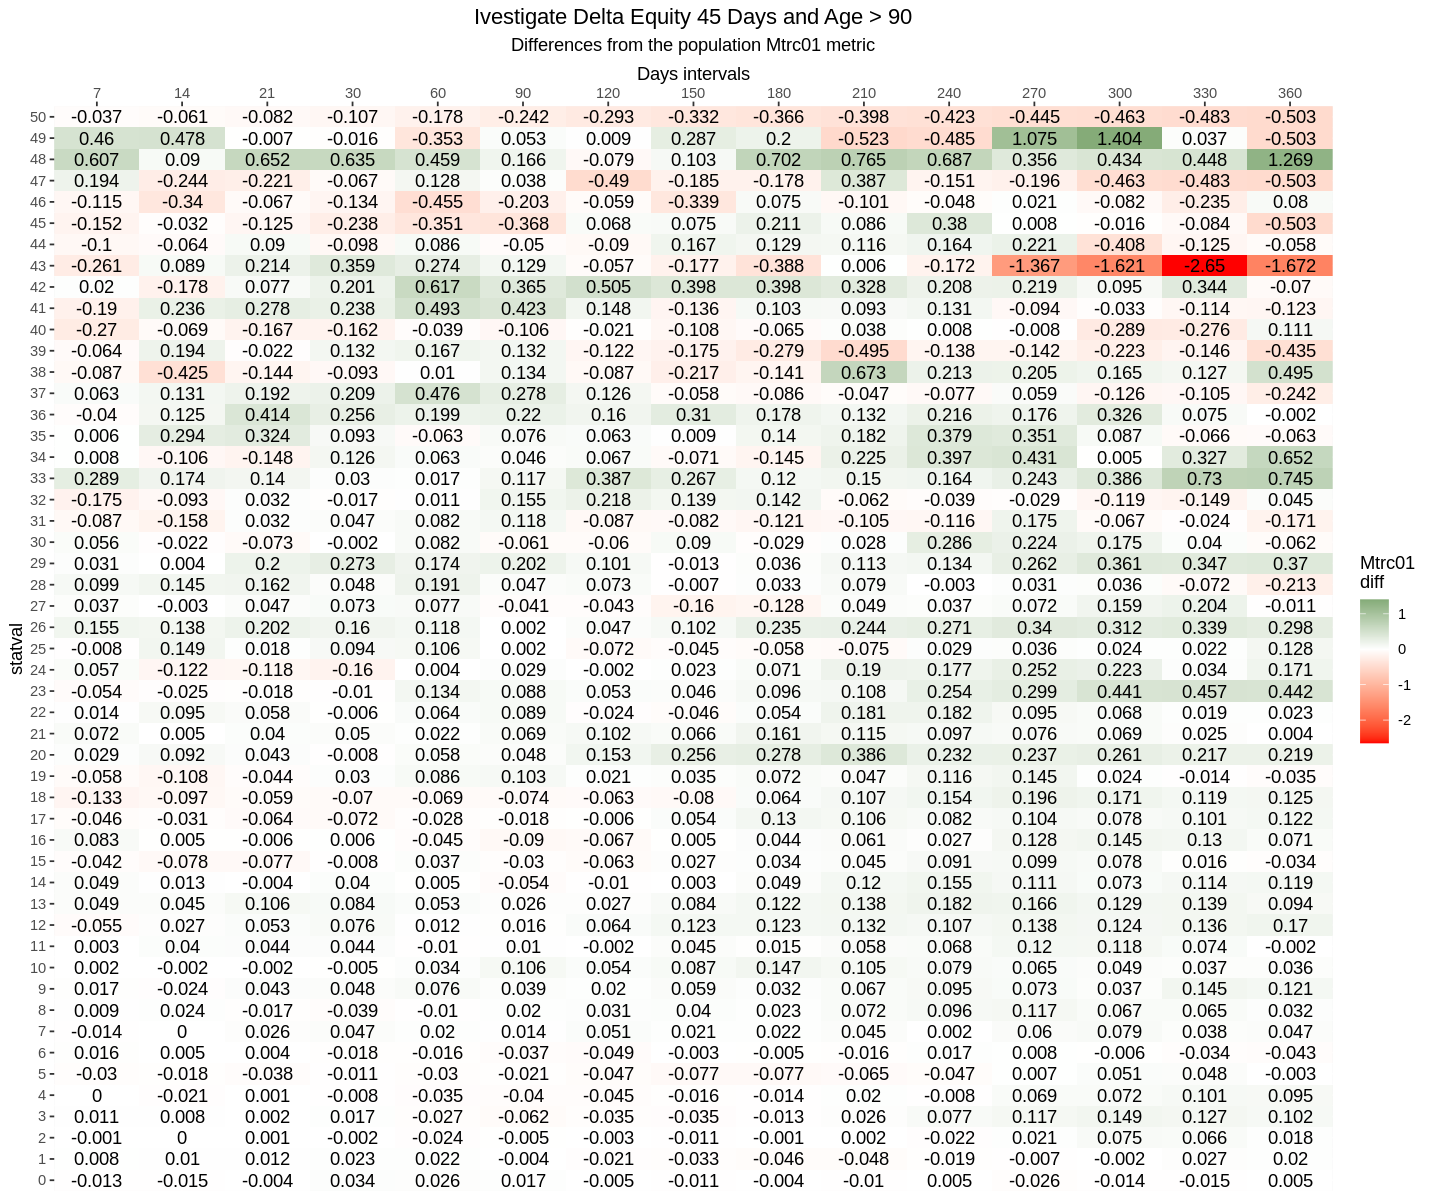

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection          Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50  10     10     10      9      9      6      5      5   
2  48 <= statval < 49  11     11     11     11     10      8      8      7   
3  47 <= statval < 48  11     10     10     10      8      6      4      4   
4  46 <= statval < 47  19     19     18     18     14     12      9      8   
5  45 <= statval < 46  16     15     15     15     10     10      9      9   
6  44 <= statval < 45  22     22     21     21     19     14     14     12   
7  43 <= statval < 44  23     22     22     20     18     17     14     12   
8  42 <= statval < 43  17     17     16     15     11     10      9      7   
9  41 <= statval < 42  23     22     22     22     15     13     11     11   
10 40 <= statval < 41  34     33     31     31     28     24     20     18   
11 39 <= statval < 40  33     32     32     31     29     24     22     18   
12 38 <= statval < 39  26     26     25     24     19     17     13      9   
13 37 <= statval < 38  36     35     35     33     29     26     23     20   
14 36 <= statval < 37  37     36     34     31     27     25     22     21   
15 35 <= statval < 36  36     36     36     36     32     30     22     21   
16 34 <= statval < 35  38     37     36     31     23     18     14     12   
17 33 <= statval < 34  47     46     46     44     38     30     25     22   
18 32 <= statval < 33  48     48     46     43     41     40     34     33   
19 31 <= statval < 32  55     54     52     52     44     39     32     30   
20 30 <= statval < 31  58     55     54     52     43     39     36     31   
21 29 <= statval < 30  74     72     67     65     58     51     47     43   
22 28 <= statval < 29  80     79     75     73     61     53     47     42   
23 27 <= statval < 28  81     80     79     77     71     61     54     47   
24 26 <= statval < 27  96     94     90     85     81     65     58     52   
25 25 <= statval < 26 108    107    104    102     87     78     70     60   
26 24 <= statval < 25 109    106    106    104     85     79     73     67   
27 23 <= statval < 24 113    112    108    104     90     82     67     62   
28 22 <= statval < 23 160    151    146    141    121    102     92     76   
29 21 <= statval < 22 160    159    156    152    134    122    106     82   
30 20 <= statval < 21 164    158    156    152    135    112    100     84   
31 19 <= statval < 20 180    179    176    172    156    138    121    106   
32 18 <= statval < 19 195    194    186    174    153    134    122    109   
33 17 <= statval < 18 220    214    209    200    173    149    133    121   
34 16 <= statval < 17 268    262    255    247    217    188    166    145   
35 15 <= statval < 16 294    287    282    269    240    218    192    166   
36 14 <= statval < 15 293    282    278    271    237    204    182    168   
37 13 <= statval < 14 333    328    317    300    269    224    206    186   
38 12 <= statval < 13 355    348    341    337    306    267    239    217   
39 11 <= statval < 12 389    383    374    366    324    290    256    233   
40 10 <= statval < 11 431    425    411    399    344    308    280    251   
41 9 <= statval < 10  480    468    454    430    386    334    305    278   
42 8 <= statval < 9   522    510    498    479    423    356    321    294   
43 7 <= statval < 8   565    551    535    519    455    397    350    320   
44 6 <= statval < 7   595    581    572    555    480    421    381    342   
45 5 <= statval < 6   635    617    595    572    516    448    410    369   
46 4 <= statval < 5   693    676    656    639    570    502    452    397   
47 3 <= statval < 4   734    712    698    664    579    514    468    417   
48 2 <= statval < 3   786    762    743    702    611    537    468    415   
49 1 <= statval < 2   810    784    768    729    643    553    495    440   
50 0 <= statval < 1   827    797    767    737    637    555    499    444   
   Sys180 Sys210 Sys240 S

### Discussion

..............................